<a href="https://colab.research.google.com/github/sanjeevganji/Classification-AI-Project/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#SkillVertex Major Project by Ganji Sanjeev Raj

#installing libraries

from pandas import   read_csv
from pandas.plotting   import scatter_matrix

from matplotlib import   pyplot

from   sklearn.model_selection import train_test_split
from   sklearn.model_selection import cross_val_score
from   sklearn.model_selection import StratifiedKFold
from   sklearn.metrics         import classification_report
from   sklearn.metrics         import confusion_matrix
from   sklearn.metrics         import accuracy_score
from   sklearn.linear_model    import LogisticRegression
from   sklearn.tree            import   DecisionTreeClassifier
from   sklearn.neighbors       import KNeighborsClassifier
from   sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from   sklearn.naive_bayes     import GaussianNB
from   sklearn.svm             import   SVC
from   sklearn.ensemble        import RandomForestClassifier


In [ ]:
import sys

print('Python:   {}'.format(sys.version))

# scipy

import scipy

print('scipy: {}'.format(scipy.__version__))

# numpy

import numpy

print('numpy:   {}'.format(numpy.__version__))

# matplotlib

import matplotlib

print('matplotlib:   {}'.format(matplotlib.__version__))

# pandas

import pandas

print('pandas:   {}'.format(pandas.__version__))

# scikit-learn

import sklearn

print('sklearn:   {}'.format(sklearn.__version__))

#It is noted that the environment has been installed successfully. However some of the libraries are on updated versions.

Python:   3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
scipy: 1.4.1
numpy:   1.21.6
matplotlib:   3.2.2
pandas:   1.3.5
sklearn:   1.0.2


In [ ]:
#loading data set

names = ['sepal-length',   'sepal-width', 'petal-length', 'petal-width', 'class']
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

df = read_csv(url , names=names)

#dataset summary

print("shape of data:")
print(df.shape)

print("number of elements in data:")
print(df.size)


shape of data:
(150, 5)
number of elements in data:
750


In [ ]:
#peek at the data
print(df.head(31))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [ ]:
print(df.groupby('class').count())

                 sepal-length  sepal-width  petal-length  petal-width
class                                                                
Iris-setosa                50           50            50           50
Iris-versicolor            50           50            50           50
Iris-virginica             50           50            50           50


In [ ]:
print(df.groupby('class').size())

#from the class distribution it is observed that the given data is equally divided between the three classes.

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [ ]:
#detailed desccription of the data
print(df.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


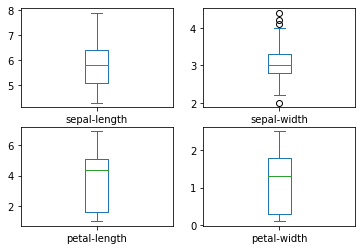

In [ ]:
  #visualizing the data:

  #univariate plots
  #ends of whiskers show minimum and maximum values 
  #ends of box show lower quartile and upper quartile values
  #center of box shows median value

  df.plot(kind='box',   subplots=True, layout=(2,2), sharex=False, sharey=False)

pyplot.show()

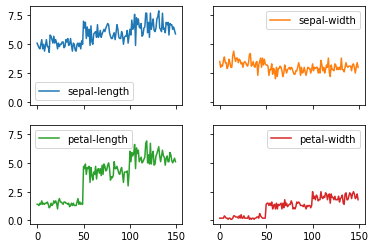

In [ ]:
#line graphs

df.plot(kind='line',   subplots=True, layout=(2,2), sharex=True, sharey=True)
pyplot.show()

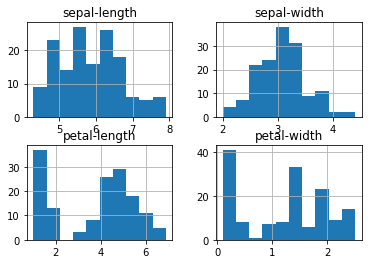

In [ ]:
#histograms

df.hist()

pyplot.show()

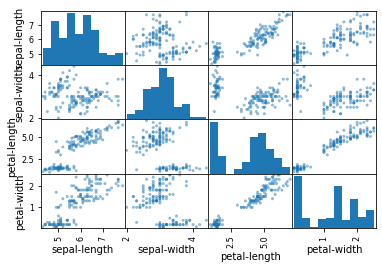

In [ ]:
#scatter matrix plot

scatter_matrix(df)

pyplot.show()

In [ ]:
# evaluating the algorithms

# splitting the data set into training and testing data

#creating training data set

array = df.values

X = array[:,0:4]

y = array[:,4]

X_train, X_test,     Y_train, Y_test      = train_test_split(X, y, test_size=0.20, random_state=2)

#testing data mentioned above will be used later

In [ ]:
#It is noted that 90% of the data is used for training while the remaining 10% for testing.

# The following 6 algorithms are tested individually to find the most efficient one.
#Logistic Regression (LR)
#LinearDiscriminantAnalysis(LDA)
#K-Nearest Neighbors (KNN).
#Classification and Regression Trees (CART).
#Gaussian Naive Bayes (NB).
#Support Vector Machines (SVM)

#Running each model seperately:

In [ ]:
models = []

models.append(('LR',   LogisticRegression(solver='liblinear', multi_class='ovr')))

results = []

names = []

for name, model in   models:
  kfold = StratifiedKFold(n_splits=10, random_state=1,   shuffle=True)

cv_results = cross_val_score(model, X_train, Y_train,   cv=kfold, scoring='accuracy')

results.append(cv_results)

names.append(name)

print('%s: %f (%f)' % (name, cv_results.mean(),   cv_results.std()))

LR: 0.950000 (0.066667)


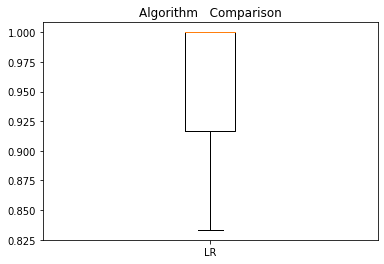

In [ ]:
#Box and Whiskers Plot
pyplot.boxplot(results,   labels=names)

pyplot.title('Algorithm   Comparison')

pyplot.show()

In [ ]:
models.append(('LDA',   LinearDiscriminantAnalysis()))

results = []

names = []

for name, model in   models:
  kfold = StratifiedKFold(n_splits=10, random_state=1,   shuffle=True)

cv_results = cross_val_score(model, X_train, Y_train,   cv=kfold, scoring='accuracy')

results.append(cv_results)

names.append(name)

print('%s: %f (%f)' % (name, cv_results.mean(),   cv_results.std()))



LDA: 0.975000 (0.053359)


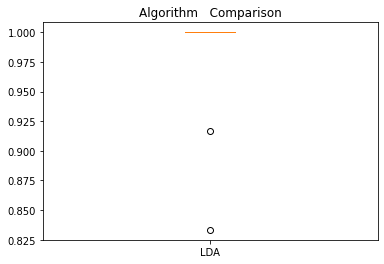

In [ ]:
#Box and Whiskers Plot
pyplot.boxplot(results,   labels=names)

pyplot.title('Algorithm   Comparison')

pyplot.show()

In [ ]:
models.append(('KNN',   KNeighborsClassifier()))

results = []

names = []

for name, model in   models:
  kfold = StratifiedKFold(n_splits=10, random_state=1,   shuffle=True)

cv_results = cross_val_score(model, X_train, Y_train,   cv=kfold, scoring='accuracy')

results.append(cv_results)

names.append(name)

print('%s: %f (%f)' % (name, cv_results.mean(),   cv_results.std()))




KNN: 0.950000 (0.066667)


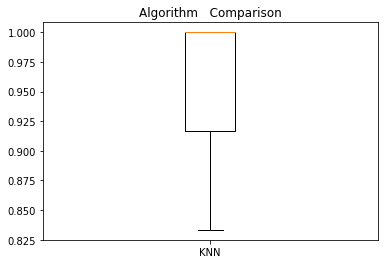

In [ ]:
#Box and Whiskers Plot
pyplot.boxplot(results,   labels=names)

pyplot.title('Algorithm   Comparison')

pyplot.show()

In [ ]:
models.append(('CART',   DecisionTreeClassifier()))

results = []

names = []

for name, model in   models:
  kfold = StratifiedKFold(n_splits=10, random_state=1,   shuffle=True)

cv_results = cross_val_score(model, X_train, Y_train,   cv=kfold, scoring='accuracy')

results.append(cv_results)

names.append(name)

print('%s: %f (%f)' % (name, cv_results.mean(),   cv_results.std()))



CART: 0.941667 (0.065085)


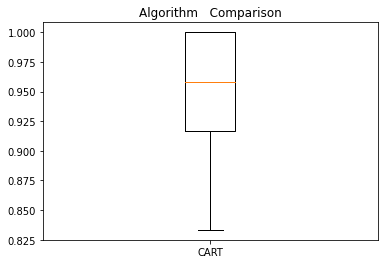

In [ ]:
#Box and Whiskers Plot
pyplot.boxplot(results,   labels=names)

pyplot.title('Algorithm   Comparison')

pyplot.show()

In [ ]:
models.append(('NB',   GaussianNB()))

results = []

names = []

for name, model in   models:
  kfold = StratifiedKFold(n_splits=10, random_state=1,   shuffle=True)

cv_results = cross_val_score(model, X_train, Y_train,   cv=kfold, scoring='accuracy')

results.append(cv_results)

names.append(name)

print('%s: %f (%f)' % (name, cv_results.mean(),   cv_results.std()))

NB: 0.950000 (0.066667)


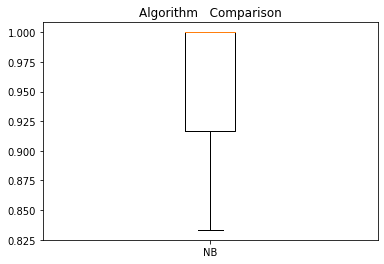

In [ ]:
#Box and Whiskers Plot
pyplot.boxplot(results,   labels=names)

pyplot.title('Algorithm   Comparison')

pyplot.show()

In [ ]:
models.append(('SVM',   SVC(gamma='auto')))

results = []

names = []

for name, model in   models:
  kfold = StratifiedKFold(n_splits=10, random_state=1,   shuffle=True)

cv_results = cross_val_score(model, X_train, Y_train,   cv=kfold, scoring='accuracy')

results.append(cv_results)

names.append(name)

print('%s: %f (%f)' % (name, cv_results.mean(),   cv_results.std()))

SVM: 0.966667 (0.055277)


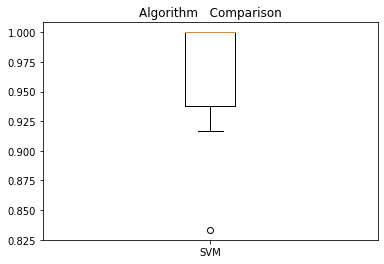

In [ ]:
#Box and Whiskers Plot
pyplot.boxplot(results,   labels=names)

pyplot.title('Algorithm   Comparison')

pyplot.show()

In [ ]:
#It is observed that Linear Discriminant Analysis LDA is best. Hence we will re-initiate the algorithm under a new name.

In [ ]:
models.append(('Best',   LinearDiscriminantAnalysis()))

results = []

names = []

for name, model in   models:
  kfold = StratifiedKFold(n_splits=10, random_state=1,   shuffle=True)

cv_results = cross_val_score(model, X_train, Y_train,   cv=kfold, scoring='accuracy')

results.append(cv_results)

names.append(name)

print('%s: %f (%f)' % (name, cv_results.mean(),   cv_results.std()))




Best: 0.975000 (0.053359)


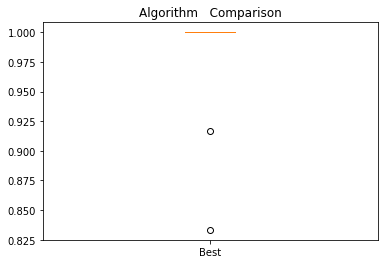

In [ ]:
#Box and Whiskers Plot
pyplot.boxplot(results,   labels=names)

pyplot.title('Algorithm   Comparison')

pyplot.show()

In [ ]:
#From the above results a safe prediction is made that LinearDiscriminantAnalysis(LDA) is the most accurate model for the given data set.

#Validating the results:

model = LinearDiscriminantAnalysis()

model.fit(X_train,   Y_train)

predictions =   model.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,   predictions))

print(confusion_matrix(Y_test,   predictions))

print(classification_report(Y_test,   predictions))

1.0
[[14  0  0]
 [ 0  8  0]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
#It is very interesting that the selected model gives a 100% accuracy on the testing sample.

#Thus marks the end of the Major project. Thank you.

#NAME: GANJI SANJEEV RAJ

#INSTITUTE: IIT KHARAGPUR

#DATE: 05-06-2022

#CONTACT: 9182043099 / SANJEEVRAJGANJI@GMAIL.COM
